# Description

#### Ethereum (ETH) is a cryptocurrency . Users are able to generate ETH through the process of mining. Ethereum has a current supply of 118,779,130.1865. The last known price of Ethereum is 3,909.54196658 USD .It is currently trading on 4548 active market(s) with dollar 21,642,412,380.90 traded over the last 24 hours. More information can be found at https://www.ethereum.org/.

In [1]:
## Importing the Packages
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline


In [47]:
# Importing the data

raw_data = yfinance.download(tickers="ETH-USD",interval="1d",
                             group_by="ticker",auto_adjust = True,treads = True)


#All in one " "

[*********************100%***********************]  1 of 1 completed


In [48]:
df = raw_data.copy()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,164329
2015-08-08,2.793760,2.798810,0.714725,0.753325,674188
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283
2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100


In [49]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-15,3862.251465,4086.372803,3664.719971,4018.388672,26411188833
2021-12-16,4020.415039,4110.368652,3956.057129,3962.469727,19825531254
2021-12-17,3959.012451,3992.792480,3711.424561,3879.486572,23143541098
2021-12-18,3880.291504,3993.829834,3774.614990,3960.860107,19530895889
2021-12-19,3962.564697,4018.658447,3894.731201,3898.982666,15685180416


In [50]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [51]:
# Unix-time to 
# Resampling to daily frequency
df = df.asfreq("d")

start_date = "2020-12-01"
end_date = "2021-12-01"

In [52]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1463100.0


In [53]:
df.isnull().sum()

Open      4
High      4
Low       4
Close     4
Volume    4
dtype: int64

In [54]:
df.dropna(inplace=True)

In [55]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<AxesSubplot:xlabel='Date'>

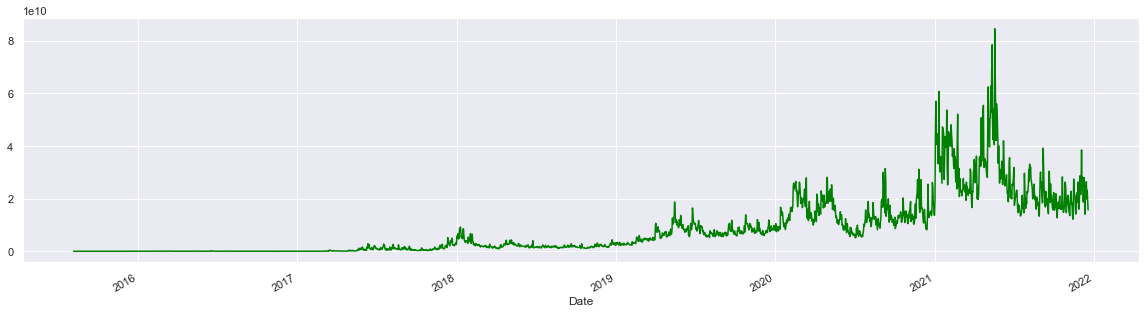

In [56]:
df["Volume"].plot(color = "green",figsize = (20,5))

In [86]:
print("Correlation")

print("Open and Volume: " + str(df["Volume"].corr(df["Open"])))

print("Close and Volume: " + str(df["Close"].corr(df["Volume"])))

Correlation
Open and Volume: 0.5702386654612122
Close and Volume: 0.5705922113010301


In [83]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

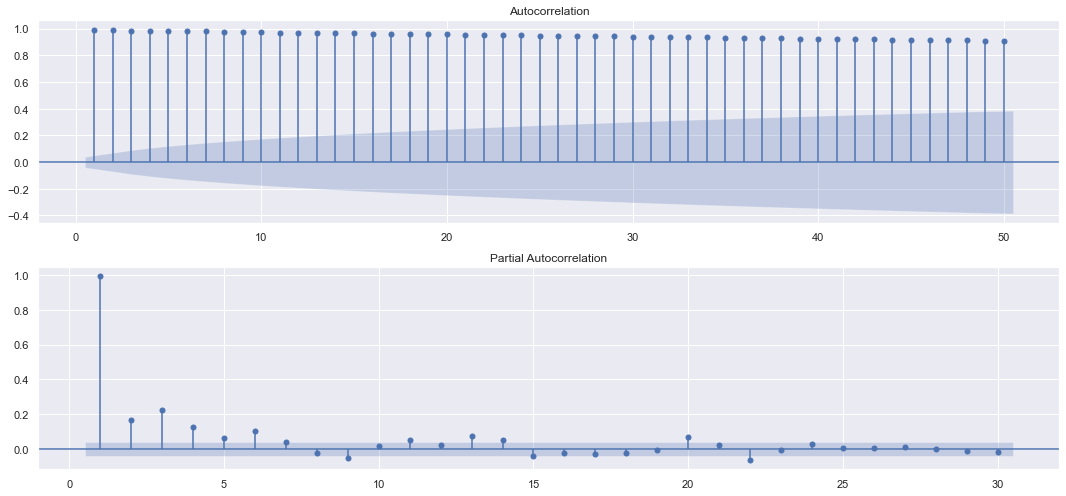

In [61]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df.Volume[13:].values.squeeze(), lags=50, ax=ax,zero=False)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df.Volume[13:].values.squeeze(), lags=30,zero=False
                          , ax=ax)
plt.tight_layout()
plt.show()

### Seems that the first lag is more significant

In [62]:
mod_pr_post_por = auto_arima(df.Volume,exogenous= df[['Open', 'High', 'Low', 'Close']],
                            max_p=5,max_q=5,m=5)

In [63]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2323
Model:             SARIMAX(0, 1, 2)x(2, 0, [], 5)   Log Likelihood               -9050.990
Date:                            Mon, 20 Dec 2021   AIC                          18119.980
Time:                                    01:01:49   BIC                          18171.732
Sample:                                         0   HQIC                         18138.839
                                           - 2323                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.0095      0.005     -1.847      0.065      -0.019       0.001
High           0.1266      0.006     20.327      0.000       0.114       0.139
Low           -0.1035      0.005    -22.723      0.000      -0.112      -0.095
Close          0.0086      0.006      1.405      0.160      -0.003       0.021
ma.L1         -0.3504      0.017    -20.440      0.000      -0.384      -0.317
ma.L2         -0.2351      0.019    -12.628      0.000      -0.272      -0.199
ar.S.L5       -0.0310      0.018     -1.701      0.089      -0.067       0.005
ar.S.L10      -0.0847      0.018     -4.597      0.000      -0.121      -0.049
sigma2       142.2678      3.056     46.553      0.000     136.278     148.258
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               471.45
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.68
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(df.Volume, exog = df[['Open', 'High', 'Low', 'Close']], order=(0,1,2), seasonal_order = (2,0,0,5))
results_sarimax = model_sarimax.fit()

df_pred_sarimax_volume = results_sarimax.predict(start = start_date, end = end_date, 
                                          exog = df[['Open', 'High', 'Low', 'Close']][start_date:end_date]) 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89872D+00    |proj g|=  2.49380D-01

At iterate    5    f=  3.89676D+00    |proj g|=  7.99187D-02

At iterate   10    f=  3.89632D+00    |proj g|=  1.21360D-02

At iterate   15    f=  3.89630D+00    |proj g|=  1.12215D-03

At iterate   20    f=  3.89627D+00    |proj g|=  9.09809D-03

At iterate   25    f=  3.89625D+00    |proj g|=  1.71065D-03

At iterate   30    f=  3.89625D+00    |proj g|=  3.16430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

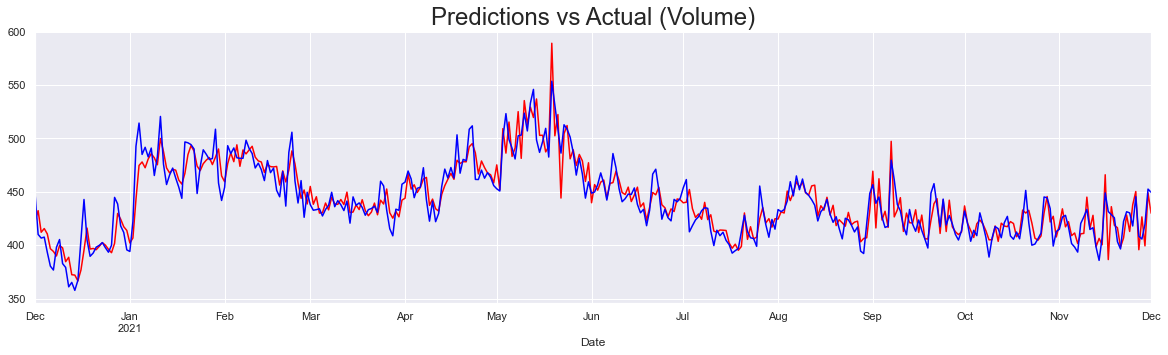

In [65]:
df_pred_sarimax_volume[start_date:end_date].plot(figsize = (20,5), color = "red")
df.Volume[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Volume)", size = 24)
plt.show()

### This is OK

# Volatility

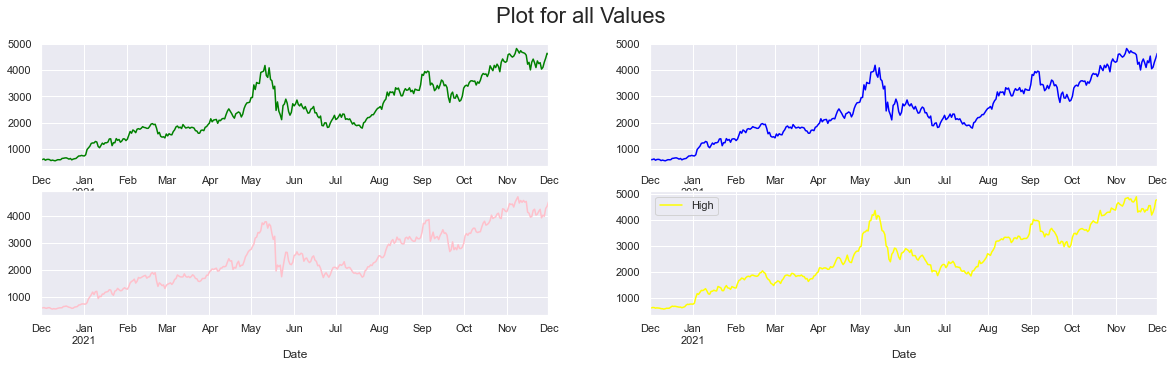

In [77]:
plt.suptitle('Plot for all Values', fontsize=22)
df.Volume[start_date:end_date].plot(figsize = (20,5),color = "red")

plt.subplot(221)
df.Close[start_date:end_date].plot(figsize = (20,5),color = "green")

plt.subplot(222)
df.Open[start_date:end_date].plot(figsize = (20,5),color = "blue")

plt.subplot(223)
df.Low[start_date:end_date].plot(figsize = (20,5),color = "pink")

plt.subplot(224)
df.High[start_date:end_date].plot(figsize = (20,5),color = "yellow")

plt.legend()

### Volatility Trends for Each Period

In [79]:
model_garch_pre = arch_model(df.Volume[start_date:end_date],mean="Constant",vol="GARCH",p = 1,q = 1)
result_garch_pre = model_garch_pre.fit(update_freq=6)
result_garch_pre.summary()


Iteration:      6,   Func. Count:     36,   Neg. LLF: 1736.5201814621228
Iteration:     12,   Func. Count:     66,   Neg. LLF: 1732.9902679306315
Iteration:     18,   Func. Count:     96,   Neg. LLF: 1732.7811382198738
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1732.781123673812
            Iterations: 20
            Function evaluations: 107
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Volume   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1732.78
Distribution:                  Normal   AIC:                           3473.56
Method:            Maximum Likelihood   BIC:                           3489.17
                                        No. Observations:                  366
Date:                Mon, Dec 20 2021   Df Residuals:                      365
Time:                        01:07:56   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           432.1767      2.266    190.747      0.000 [4.277e+02,4.366e+02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega        107.6024     48.616      2.213  2.688e-02  [ 12.316,2.029e+02]
alpha[1]       0.6373      0.158      4.041  5.325e-05    [  0.328,  0.946]
beta[1]        0.3113      0.175      1.783  7.467e-02 [-3.099e-02,  0.654]
===========================================================================

Covariance estimator: robust
"""

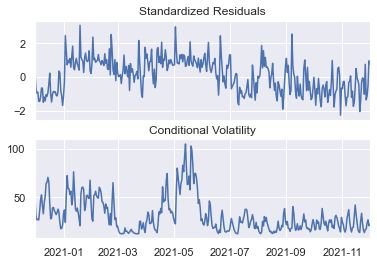

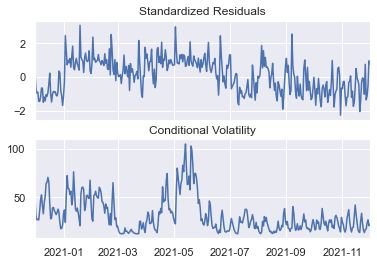

In [82]:
result_garch_pre.plot()